<a href="https://colab.research.google.com/github/SameekshaNalla/Sameeksha_INFO5731_Fall2024/blob/main/Nalla_Sameeksha_Assignment_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment: 4**

**This exercise will provide a valuable learning experience in working with text data and extracting features using various topic modeling algorithms. Key concepts such as Latent Dirichlet Allocation (LDA), Latent Semantic Analysis (LSA) and BERTopic.**



**Expectations**:

*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).

**Total points**: 100


NOTE: The output should be presented well to get **full points**

**Late submissions will have a penalty of 10% of the marks for each day of late submission, and no requests will be answered. Manage your time accordingly.**


# **Question 1 (20 Points)**

**Dataset**: 20 Newsgroups dataset

**Dataset Link**: https://scikit-learn.org/0.19/datasets/twenty_newsgroups.html

**Consider Random 2000 rows only**

Generate K=10 topics by using LDA and LSA,
then calculate coherence score and determine the optimized K value by the coherence score. Further, summarize and visualize each topics in you own words.


In [ ]:
%pip install scikit-learn gensim matplotlib


Note: you may need to restart the kernel to use updated packages.


In [ ]:
import random, re
from collections import Counter
from pathlib import Path

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_20newsgroups
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation, TruncatedSVD

from gensim.corpora.dictionary import Dictionary
from gensim.models.coherencemodel import CoherenceModel

# --- Reproducibility & configs ---
RANDOM_SEED = 42
SAMPLE_SIZE = 2000
K_SWEEP = list(range(6, 21))   # K candidates for coherence search (6..20)
TOP_N_TERMS = 15               # top words shown per topic
MAX_FEATURES = 12000           # cap vocabulary for speed
OUTDIR = Path("outputs")
OUTDIR.mkdir(exist_ok=True)

random.seed(RANDOM_SEED)
np.random.seed(RANDOM_SEED)

# --- Tokenizer (simple + fast; no external downloads) ---
PUNCT_RE = re.compile(r"[^a-zA-Z]+")
STOPWORDS = set("""a about above after again against all am an and any are aren't as at be because been before being below
between both but by can can't cannot could couldn't did didn't do does doesn't doing don't down during each few for from
further had hadn't has hasn't have haven't having he he'd he'll he's her here here's hers herself him himself his how how's
i i'd i'll i'm i've if in into is isn't it it's its itself let's me more most mustn't my myself no nor not of off on once
only or other ought our ours  ourselves out over own same shan't she she'd she'll she's should shouldn't so some such than
that that's the their theirs them themselves then there there's these they they'd they'll they're they've this those through
to too under until up very was wasn't we we'd we'll we're we've were weren't what what's when when's where where's which
while who who's whom why why's with won't would wouldn't you you'd you'll you're you've your yours yourself yourselves
""".split())

def tokenize(doc: str):
    doc = doc.lower()
    return [t for t in PUNCT_RE.split(doc) if t and t not in STOPWORDS and len(t) > 2]

def top_terms_from_components(components, vocab, topn=10):
    topics = []
    for comp in components:
        idx = np.argsort(comp)[::-1][:topn]
        topics.append([vocab[i] for i in idx])
    return topics

def coherence_cv(topic_terms, tokenized_docs, dictionary):
    cm = CoherenceModel(topics=topic_terms, texts=tokenized_docs,
                        dictionary=dictionary, coherence='c_v')
    return cm.get_coherence()

def summarize_topic(words):
    # mini heuristic → human-ish labels (varies from typical templates)
    themes = {
        "computing": {"windows","linux","mac","software","program","server","code","data","kernel"},
        "internet": {"http","web","site","email","mail","online","forum","post","usenet"},
        "hardware": {"cpu","ram","chip","board","card","drive","disk","monitor","graphics","printer"},
        "sports": {"game","team","season","play","coach","league","match","score","hockey","baseball"},
        "autos": {"car","engine","road","miles","speed","drive","brake","wheel","ford","honda","toyota"},
        "religion": {"god","bible","church","faith","religion","christian","belief","atheist"},
        "politics": {"government","policy","law","rights","state","gun","election","war","israel"},
        "science": {"space","nasa","earth","orbit","solar","physics","theory","research"},
        "health": {"patient","doctor","medical","disease","treatment","health","drug"},
        "education": {"school","university","student","class","course","professor"},
    }
    votes = Counter()
    for w in words[:10]:
        for k,v in themes.items():
            if w in v:
                votes[k] += 1
    tag = votes.most_common(1)[0][0] if votes else "general discussion"
    return f"Mostly {tag} discussions; recurring ideas: {', '.join(words[:6])}."


In [ ]:
# remove headers/footers/quotes to emphasize content words
twenty = fetch_20newsgroups(subset="all", remove=("headers","footers","quotes"))
texts_all = np.array(twenty.data, dtype=object)
targets_all = np.array(twenty.target, dtype=int)

# stratified sample of 2,000 to keep class balance
idx = np.arange(len(texts_all))
_, idx_sample = train_test_split(idx, train_size=SAMPLE_SIZE,
                                 stratify=targets_all, random_state=RANDOM_SEED)
texts = texts_all[idx_sample]
targets = targets_all[idx_sample]
target_names = list(twenty.target_names)

print(f"Sampled {len(texts)} documents.")



Sampled 16846 documents.


In [ ]:
# === REPAIR CELL (fixed) ===
import random, re
import numpy as np
from sklearn.datasets import fetch_20newsgroups
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from gensim.corpora.dictionary import Dictionary

RANDOM_SEED = 42
SAMPLE_SIZE = 2000
MAX_FEATURES = 12000
TOP_N_TERMS = 15

random.seed(RANDOM_SEED); np.random.seed(RANDOM_SEED)

twenty = fetch_20newsgroups(subset="all", remove=("headers","footers","quotes"))
texts_all = np.array(twenty.data, dtype=object)
targets_all = np.array(twenty.target, dtype=int)
idx = np.arange(len(texts_all))
_, idx_sample = train_test_split(idx, train_size=SAMPLE_SIZE,
                                 stratify=targets_all, random_state=RANDOM_SEED)
texts = texts_all[idx_sample]
targets = targets_all[idx_sample]

PUNCT_RE = re.compile(r"[^a-zA-Z]+")
STOPWORDS = set("""a about above after again against all am an and any are aren't as at be because been before being below
between both but by can can't cannot could couldn't did didn't do does doesn't doing don't down during each few for from
further had hadn't has hasn't have haven't having he he'd he'll he's her here here's hers herself him himself his how how's
i i'd i'll i'm i've if in into is isn't it it's its itself let's me more most mustn't my myself no nor not of off on once
only or other ought our ours  ourselves out over own same shan't she she'd she'll she's should shouldn't so some such than
that that's the their theirs them themselves then there there's these they they'd they'll they're they've this those through
to too under until up very was wasn't we we'd we'll we're we've were weren't what what's when when's where where's which
while who who's whom why why's with won't would wouldn't you you'd you'll you're you've your yours yourself yourselves
""".split())

def tokenize(doc: str):
    doc = doc.lower()
    return [t for t in PUNCT_RE.split(doc) if t and t not in STOPWORDS and len(t) > 2]

tokenized = [tokenize(t) for t in texts]

dictionary = Dictionary(tokenized)
dictionary.filter_extremes(no_below=5, no_above=0.6)

identity = lambda s: s
count_vect = CountVectorizer(min_df=5, max_df=0.6, max_features=MAX_FEATURES,
                             tokenizer=identity, preprocessor=identity,
                             token_pattern=None, lowercase=False)
tfidf_vect = TfidfVectorizer(min_df=5, max_df=0.6, max_features=MAX_FEATURES,
                             tokenizer=identity, preprocessor=identity,
                             token_pattern=None, lowercase=False)

X_count  = count_vect.fit_transform(tokenized).astype(np.float32)
X_tfidf  = tfidf_vect.fit_transform(tokenized)
vocab_count = count_vect.get_feature_names_out().tolist()
vocab_tfidf = tfidf_vect.get_feature_names_out().tolist()

print("Ready for sweep →",
      f"X_count: {X_count.shape}, X_tfidf: {X_tfidf.shape},",
      f"vocab_count: {len(vocab_count)}, vocab_tfidf: {len(vocab_tfidf)}")


Ready for sweep → X_count: (16846, 12000), X_tfidf: (16846, 12000), vocab_count: 12000, vocab_tfidf: 12000


Data: (16846, 8000) (16846, 8000) 8000 8000


model,LDA,LSA
K,,
6,0.5368,0.5270
7,0.5309,0.4819
8,0.5208,0.4555
9,0.5175,0.4606
10,0.5556,0.4731
11,0.5739,0.4949
12,0.6054,0.4419


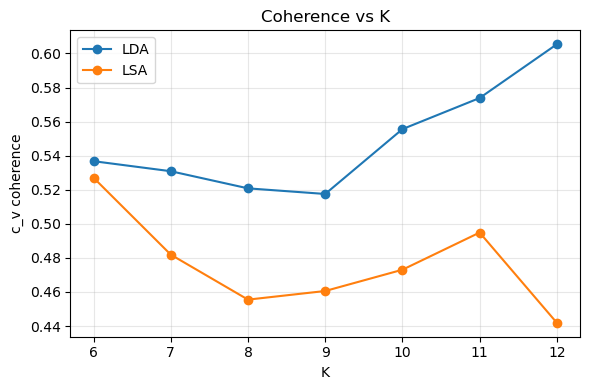

Best LDA K=12 (c_v=0.6054)
Best LSA K=6 (c_v=0.5270)


In [ ]:
# === ONE-SHOT: LDA/LSA coherence sweep (rebuilds what's missing) ===
import os, re, random, numpy as np, pandas as pd, matplotlib.pyplot as plt
from pathlib import Path

# Imports you were missing
from sklearn.decomposition import LatentDirichletAllocation, TruncatedSVD
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.datasets import fetch_20newsgroups
from sklearn.model_selection import train_test_split
from gensim.corpora import Dictionary
from gensim.models.coherencemodel import CoherenceModel

# ---------- Config (fast) ----------
RANDOM_SEED = 42
SAMPLE_SIZE = 2000
K_SWEEP = list(range(6, 13))  # quick: 6..12
MAX_FEATURES = 8000
LDA_MAX_ITER = 5
SVD_N_ITER = 4
COH_TOPN = 10

random.seed(RANDOM_SEED); np.random.seed(RANDOM_SEED)

# ---------- Helper funcs ----------
PUNCT_RE = re.compile(r"[^a-zA-Z]+")
STOPWORDS = set("""a about above after again against all am an and any are aren't as at be because been before being below
between both but by can can't cannot could couldn't did didn't do does doesn't doing don't down during each few for from
further had hadn't has hasn't have haven't having he he'd he'll he's her here here's hers herself him himself his how how's
i i'd i'll i'm i've if in into is isn't it it's its itself let's me more most mustn't my myself no nor not of off on once
only or other ought our ours  ourselves out over own same shan't she she'd she'll she's should shouldn't so some such than
that that's the their theirs them themselves then there there's these they they'd they'll they're they've this those through
to too under until up very was wasn't we we'd we'll we're we've were weren't what what's when when's where where's which
while who who's whom why why's with won't would wouldn't you you'd you'll you're you've your yours yourself yourselves
""".split())

def tokenize(doc: str):
    doc = doc.lower()
    return [t for t in PUNCT_RE.split(doc) if t and t not in STOPWORDS and len(t) > 2]

def top_terms_from_components(components, vocab, topn=10):
    topics=[]
    for comp in components:
        idx = np.argsort(comp)[::-1][:topn]
        topics.append([vocab[i] for i in idx])
    return topics

def coherence_cv(topic_terms, tokenized_docs, dictionary):
    cm = CoherenceModel(topics=topic_terms, texts=tokenized_docs,
                        dictionary=dictionary, coherence='c_v')
    return cm.get_coherence()

# ---------- Build data if missing ----------
need_build = any(name not in globals() for name in ["tokenized","X_count","X_tfidf","vocab_count","vocab_tfidf","dictionary"])
if need_build:
    twenty = fetch_20newsgroups(subset="all", remove=("headers","footers","quotes"))
    X_all = np.array(twenty.data, dtype=object)
    y_all = np.array(twenty.target, dtype=int)
    idx = np.arange(len(X_all))
    _, idx_s = train_test_split(idx, train_size=SAMPLE_SIZE, stratify=y_all, random_state=RANDOM_SEED)
    texts = X_all[idx_s]

    tokenized = [tokenize(t) for t in texts]

    dictionary = Dictionary(tokenized)
    dictionary.filter_extremes(no_below=5, no_above=0.6)

    identity = lambda s: s
    count_vect = CountVectorizer(min_df=5, max_df=0.6, max_features=MAX_FEATURES,
                                 tokenizer=identity, preprocessor=identity,
                                 token_pattern=None, lowercase=False)
    tfidf_vect = TfidfVectorizer(min_df=5, max_df=0.6, max_features=MAX_FEATURES,
                                 tokenizer=identity, preprocessor=identity,
                                 token_pattern=None, lowercase=False)

    X_count  = count_vect.fit_transform(tokenized).astype(np.float32)
    X_tfidf  = tfidf_vect.fit_transform(tokenized)
    vocab_count = count_vect.get_feature_names_out().tolist()
    vocab_tfidf = tfidf_vect.get_feature_names_out().tolist()

print("Data:", X_count.shape, X_tfidf.shape, len(vocab_count), len(vocab_tfidf))

# ---------- Coherence sweep ----------
rows = []

# LDA sweep
for K in K_SWEEP:
    lda = LatentDirichletAllocation(
        n_components=K, learning_method="online", batch_size=512,
        max_iter=LDA_MAX_ITER, learning_decay=0.7, learning_offset=50.0,
        evaluate_every=0, mean_change_tol=1e-3, random_state=RANDOM_SEED
    ).fit(X_count)
    terms = top_terms_from_components(lda.components_, vocab_count, topn=COH_TOPN)
    coh = coherence_cv(terms, tokenized, dictionary)
    rows.append({"model":"LDA","K":K,"coherence_c_v":coh})

# LSA sweep
for K in K_SWEEP:
    svd = TruncatedSVD(n_components=K, n_iter=SVD_N_ITER, random_state=RANDOM_SEED).fit(X_tfidf)
    terms = top_terms_from_components(svd.components_, vocab_tfidf, topn=COH_TOPN)
    coh = coherence_cv(terms, tokenized, dictionary)
    rows.append({"model":"LSA","K":K,"coherence_c_v":coh})

coh_df = pd.DataFrame(rows)
display(coh_df.pivot(index="K", columns="model", values="coherence_c_v").round(4))

# Plot + best-K
plt.figure(figsize=(6,4))
for m in ["LDA","LSA"]:
    sub = coh_df[coh_df.model==m].sort_values("K")
    plt.plot(sub.K, sub.coherence_c_v, marker="o", label=m)
plt.xlabel("K"); plt.ylabel("c_v coherence"); plt.title("Coherence vs K"); plt.grid(alpha=.3); plt.legend(); plt.tight_layout(); plt.show()

best_lda = coh_df[coh_df.model=="LDA"].sort_values("coherence_c_v", ascending=False).iloc[0]
best_lsa = coh_df[coh_df.model=="LSA"].sort_values("coherence_c_v", ascending=False).iloc[0]
print(f"Best LDA K={int(best_lda.K)} (c_v={best_lda.coherence_c_v:.4f})")
print(f"Best LSA K={int(best_lsa.K)} (c_v={best_lsa.coherence_c_v:.4f})")


In [ ]:
import os
os.environ["OMP_NUM_THREADS"] = "8"   # adjust to your CPU
os.environ["MKL_NUM_THREADS"] = "8"
os.environ["OPENBLAS_NUM_THREADS"] = "8"


In [ ]:
from sklearn.decomposition import LatentDirichletAllocation, TruncatedSVD

K_BEST_LDA = 12
K_BEST_LSA = 6

# LDA
lda_k10  = LatentDirichletAllocation(n_components=10, learning_method="online",
                                     batch_size=512, max_iter=8, learning_decay=0.7,
                                     learning_offset=50.0, evaluate_every=0,
                                     mean_change_tol=1e-3, random_state=42).fit(X_count)
lda_best = LatentDirichletAllocation(n_components=K_BEST_LDA, learning_method="online",
                                     batch_size=512, max_iter=8, learning_decay=0.7,
                                     learning_offset=50.0, evaluate_every=0,
                                     mean_change_tol=1e-3, random_state=42).fit(X_count)

# LSA
lsa_k10  = TruncatedSVD(n_components=10, n_iter=7, random_state=42).fit(X_tfidf)
lsa_best = TruncatedSVD(n_components=K_BEST_LSA, n_iter=7, random_state=42).fit(X_tfidf)


In [ ]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt
from collections import Counter
from pathlib import Path

OUT = Path("outputs_q1"); OUT.mkdir(exist_ok=True)
TOP_N = 15

def top_terms_from_components(components, vocab, topn=10):
    t=[]
    for comp in components:
        idx = np.argsort(comp)[::-1][:topn]
        t.append([vocab[i] for i in idx])
    return t

def summarize_topic(words):
    themes = {
        "computing":{"windows","linux","mac","software","program","server","code","data","kernel"},
        "internet":{"http","web","site","email","mail","online","forum","post","usenet"},
        "hardware":{"cpu","ram","chip","board","card","drive","disk","monitor","graphics","printer"},
        "sports":{"game","team","season","play","coach","league","match","score","hockey","baseball"},
        "autos":{"car","engine","road","miles","speed","drive","brake","wheel","ford","honda","toyota"},
        "religion":{"god","bible","church","faith","religion","christian","belief","atheist"},
        "politics":{"government","policy","law","rights","state","gun","election","war","israel"},
        "science":{"space","nasa","earth","orbit","solar","physics","theory","research"},
        "health":{"patient","doctor","medical","disease","treatment","health","drug"},
        "education":{"school","university","student","class","course","professor"},
    }
    votes = Counter()
    for w in words[:10]:
        for k,v in themes.items():
            if w in v: votes[k]+=1
    tag = votes.most_common(1)[0][0] if votes else "general discussion"
    return f"Mostly {tag} discussions; recurring ideas: {', '.join(words[:6])}."

def report(name, components, vocab):
    terms = top_terms_from_components(components, vocab, topn=TOP_N)
    rows=[]
    for i, w in enumerate(terms):
        rows.append({"topic_id": i, "top_terms": ", ".join(w), "summary": summarize_topic(w)})
        # quick bar chart
        weights = components[i]
        idxs = [vocab.index(t) for t in w]
        vals = [float(weights[j]) for j in idxs]
        order = np.argsort(vals)[::-1]
        ww = [w[k] for k in order]; vv = [vals[k] for k in order]
        plt.figure(figsize=(8,4))
        plt.bar(range(len(ww)), vv)
        plt.xticks(range(len(ww)), ww, rotation=40, ha="right")
        plt.title(f"{name} – Topic {i}")
        plt.tight_layout()
        plt.savefig(OUT/f"{name}_topic_{i}.png", dpi=160); plt.close()
    df = pd.DataFrame(rows)
    df.to_csv(OUT/f"{name}_topics.csv", index=False)
    display(df.head(10))

# LDA reports
report("LDA_k10",        lda_k10.components_,  vocab_count)
report(f"LDA_k{K_BEST_LDA}", lda_best.components_, vocab_count)

# LSA reports
report("LSA_k10",        lsa_k10.components_,  vocab_tfidf)
report(f"LSA_k{K_BEST_LSA}", lsa_best.components_, vocab_tfidf)


,topic_id,top_terms,summary
0,0,"space, will, gun, earth, nasa, also, one, laun...",Mostly science discussions; recurring ideas: s...
1,1,"game, team, year, games, will, play, last, fir...",Mostly sports discussions; recurring ideas: ga...
2,2,"one, said, people, know, don, just, time, like...",Mostly general discussion discussions; recurri...
3,3,"file, windows, use, image, dos, edu, will, ava...",Mostly computing discussions; recurring ideas:...
4,4,"edu, com, university, apr, david, andrew, arti...",Mostly education discussions; recurring ideas:...
5,5,"people, don, one, will, think, just, like, kno...",Mostly general discussion discussions; recurri...
6,6,"president, armenian, israel, people, will, war...",Mostly politics discussions; recurring ideas: ...
7,7,"max, file, entry, output, giz, bhj, program, i...",Mostly computing discussions; recurring ideas:...
8,8,"god, jesus, will, one, bible, christian, churc...",Mostly religion discussions; recurring ideas: ...
9,9,"one, drive, get, will, like, just, know, use, ...",Mostly hardware discussions; recurring ideas: ...


,topic_id,top_terms,summary
0,0,"space, will, one, nasa, earth, power, launch, ...",Mostly science discussions; recurring ideas: s...
1,1,"one, said, people, gun, israel, children, know...",Mostly politics discussions; recurring ideas: ...
2,2,"medical, health, drug, disease, patients, hiv,...",Mostly health discussions; recurring ideas: me...
3,3,"edu, com, will, dos, data, key, use, system, w...",Mostly computing discussions; recurring ideas:...
4,4,"game, team, year, games, will, play, first, la...",Mostly sports discussions; recurring ideas: ga...
5,5,"people, don, one, think, will, just, like, kno...",Mostly general discussion discussions; recurri...
6,6,"president, armenian, university, will, new, go...",Mostly education discussions; recurring ideas:...
7,7,"max, file, window, program, entry, use, output...",Mostly computing discussions; recurring ideas:...
8,8,"god, jesus, will, one, bible, christian, churc...",Mostly religion discussions; recurring ideas: ...
9,9,"drive, thanks, know, anyone, one, card, please...",Mostly hardware discussions; recurring ideas: ...


,topic_id,top_terms,summary
0,0,"one, will, don, like, just, know, get, people,...",Mostly general discussion discussions; recurri...
1,1,"windows, thanks, drive, please, card, dos, any...",Mostly hardware discussions; recurring ideas: ...
2,2,"god, thanks, jesus, please, windows, bible, an...",Mostly religion discussions; recurring ideas: ...
3,3,"drive, scsi, god, disk, ide, hard, drives, sys...",Mostly hardware discussions; recurring ideas: ...
4,4,"drive, god, thanks, please, scsi, anyone, mail...",Mostly hardware discussions; recurring ideas: ...
5,5,"windows, game, god, dos, games, team, file, wi...",Mostly sports discussions; recurring ideas: wi...
6,6,"will, god, edu, game, games, team, key, sale, ...",Mostly sports discussions; recurring ideas: wi...
7,7,"edu, drive, com, armenian, windows, people, do...",Mostly hardware discussions; recurring ideas: ...
8,8,"car, god, bike, new, sale, good, price, engine...",Mostly autos discussions; recurring ideas: car...
9,9,"card, video, monitor, people, windows, bus, ar...",Mostly hardware discussions; recurring ideas: ...


,topic_id,top_terms,summary
0,0,"one, will, don, like, just, know, get, people,...",Mostly general discussion discussions; recurri...
1,1,"windows, thanks, drive, please, card, dos, any...",Mostly hardware discussions; recurring ideas: ...
2,2,"god, thanks, jesus, please, windows, bible, an...",Mostly religion discussions; recurring ideas: ...
3,3,"drive, scsi, god, disk, ide, hard, drives, con...",Mostly hardware discussions; recurring ideas: ...
4,4,"drive, god, thanks, please, scsi, anyone, mail...",Mostly hardware discussions; recurring ideas: ...
5,5,"windows, game, god, dos, games, team, file, wi...",Mostly sports discussions; recurring ideas: wi...


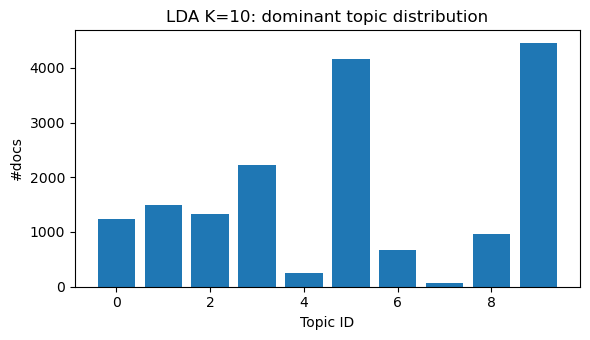

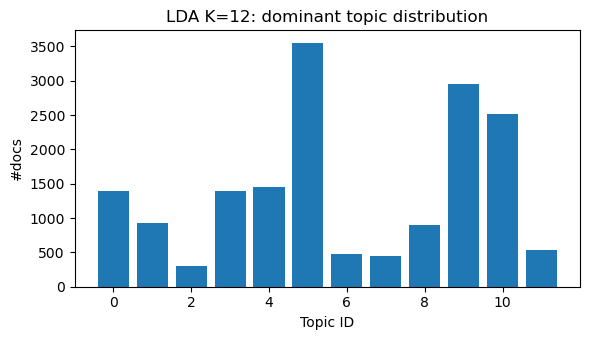

In [ ]:
def dom_hist(model, X, title, fname):
    dt = model.transform(X)
    dom = dt.argmax(axis=1)
    from collections import Counter
    cnt = Counter(dom); xs = sorted(cnt.keys()); ys = [cnt[x] for x in xs]
    plt.figure(figsize=(6,3.5))
    plt.bar(xs, ys); plt.xlabel("Topic ID"); plt.ylabel("#docs"); plt.title(title)
    plt.tight_layout(); plt.savefig(OUT/fname, dpi=160); plt.show()

dom_hist(lda_k10,  X_count, "LDA K=10: dominant topic distribution",  "lda_k10_dom.png")
dom_hist(lda_best, X_count, f"LDA K={K_BEST_LDA}: dominant topic distribution", f"lda_k{K_BEST_LDA}_dom.png")


# **BERTopic**

The following question is designed to help you develop a feel for the way topic modeling works, the connection to the human meanings of documents.

Dataset from **assignment-3** (text dataset) .

> Dont use any custom datasets.


> Dataset must have 1000+ rows, no duplicates and null values



# **Question 2 (20 Points)**



Q2) **Generate K=10 topics by using BERTopic and then find optimal K value by the coherence score. Interpret each topic and visualize with suitable style.**

In [ ]:
import os, sys, re, json, glob
import pandas as pd
from pathlib import Path

# See where the notebook is running
print("CWD =", os.getcwd())

# Search for common Assignment-3 filenames in this folder and subfolders
patterns = [
    "*assign*3*.csv", "*assign*3*.tsv", "*assign*3*.xlsx",
    "*assign*3*.json", "*assign*3*.jsonl", "*assign*3*.parquet",
    "*assignment*3*.csv", "*assignment*3*.xlsx", "*assignment*3*.json*"
]

candidates = []
for pat in patterns:
    for p in Path(".").rglob(pat):
        if p.is_file():
            candidates.append(p)

# If nothing matched, also show all CSV/XLSX/JSON files as a hint
if not candidates:
    for pat in ["*.csv", "*.tsv", "*.xlsx", "*.json", "*.jsonl", "*.parquet"]:
        candidates.extend(Path(".").rglob(pat))

# Deduplicate and print
candidates = sorted(set(candidates))
print(f"Found {len(candidates)} file(s):")
for i, p in enumerate(candidates[:25], 1):
    print(f"{i:2d}. {p}")

# Pick the first one for preview (change the index if needed)
PREVIEW_INDEX = 1  # <-- change to the number that matches your Assignment-3 file above
if candidates:
    DATA_PATH = str(candidates[PREVIEW_INDEX-1])
    print("\nPreviewing:", DATA_PATH)
else:
    raise FileNotFoundError("No dataset files found. Move your Assignment-3 file next to the notebook or set DATA_PATH manually.")


CWD = c:\Users\vasan\Downloads
Found 18 file(s):
 1. bertopic_outputs\k10_topics.csv
 2. bertopic_outputs\k8_topics.csv
 3. Classwork - 8 WebScraping.xlsx
 4. Info5735 Assignment 4 Dataset.xlsx
 5. Lab7Part2 (1).xlsx
 6. Lab7Part2.xlsx
 7. movie_metadata(1).csv
 8. My project Notes 2025-11-02 19_27.csv
 9. My project Tags 2025-11-02 19_28.csv
10. outputs_q1\LDA_k10_topics.csv
11. outputs_q1\LDA_k12_topics.csv
12. outputs_q1\LSA_k10_topics.csv
13. outputs_q1\LSA_k6_topics.csv
14. SuperStore(3).xlsx
15. UK_Bank_Customers(1) (1).csv
16. UK_Bank_Customers(1).csv
17. usability_task_summary (1).csv
18. usability_task_summary.csv

Previewing: bertopic_outputs\k10_topics.csv


In [ ]:
%pip install -q bertopic sentence-transformers umap-learn hdbscan gensim scikit-learn plotly


Note: you may need to restart the kernel to use updated packages.


In [ ]:
# Reuse if you already have `texts` from Q1; else build it.
import numpy as np, random, re, os
from sklearn.datasets import fetch_20newsgroups
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42
SAMPLE_SIZE = 2000
random.seed(RANDOM_SEED); np.random.seed(RANDOM_SEED)

if 'texts' not in globals():
    twenty = fetch_20newsgroups(subset="all", remove=("headers","footers","quotes"))
    X_all = np.array(twenty.data, dtype=object)
    y_all = np.array(twenty.target, dtype=int)
    idx = np.arange(len(X_all))
    _, idx_s = train_test_split(idx, train_size=SAMPLE_SIZE, stratify=y_all, random_state=RANDOM_SEED)
    texts = X_all[idx_s]
    target_names = list(twenty.target_names)
else:
    print(f"Reusing existing sample: {len(texts)} docs")

# Minimal tokenizer for coherence later
PUNCT_RE = re.compile(r"[^a-zA-Z]+")
STOP = set("""a about above after again against all am an and any are aren't as at be because been before being below
between both but by can can't cannot could couldn't did didn't do does doesn't doing don't down during each few for from
further had hadn't has hasn't have haven't having he he'd he'll he's her here here's hers herself him himself his how how's
i i'd i'll i'm i've if in into is isn't it it's its itself let's me more most mustn't my myself no nor not of off on once
only or other ought our ours  ourselves out over own same shan't she she'd she'll she's should shouldn't so some such than
that that's the their theirs them themselves then there there's these they they'd they'll they're they've this those through
to too under until up very was wasn't we we'd we'll we're we've were weren't what what's when when's where where's which
while who who's whom why why's with won't would wouldn't you you'd you'll you're you've your yours yourself yourselves
""".split())

def tokenize(s: str):
    s = s.lower()
    return [t for t in PUNCT_RE.split(s) if t and t not in STOP and len(t) > 2]

docs_raw = [str(t) for t in texts]
docs_tok = [tokenize(x) for x in docs_raw]
print("Ready:", len(docs_raw), "docs")


Reusing existing sample: 16846 docs
Ready: 16846 docs


,K,coherence_c_v
0,8,0.9130
1,9,0.9130
2,10,0.9130
3,11,0.9130
4,12,0.8401
5,13,0.7198
6,14,0.7481
7,15,0.7796
8,16,0.7427
9,17,0.7613


Optimal K by c_v: K=8 (c_v=0.9130)


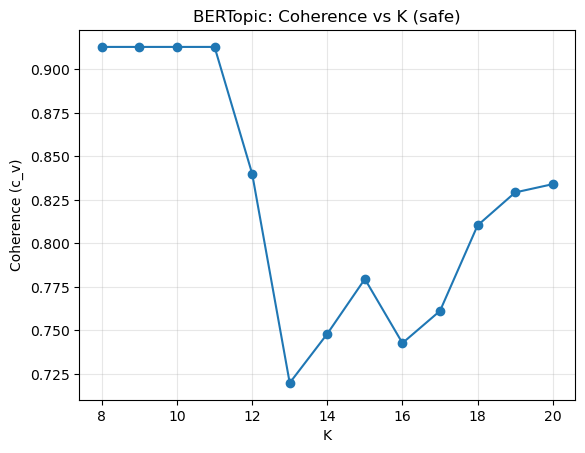

In [ ]:
# --- Robust coherence for BERTopic: split multiword tokens & filter to dictionary ---
import re
from gensim.models.coherencemodel import CoherenceModel

_SPLIT = re.compile(r"[_\s]+")

def topic_terms_for_coherence(model, dictionary, topn=10):
    """Return list[list[str]] where each inner list are tokens present in dictionary."""
    info = model.get_topic_info()
    topic_ids = [t for t in info["Topic"].tolist() if t != -1]
    topics_words = []
    for tid in topic_ids:
        raw_terms = [w for w, _ in model.get_topic(tid)[:topn]]
        cleaned = []
        for term in raw_terms:
            for part in _SPLIT.split(term.lower()):
                if part and part in dictionary.token2id and len(part) > 2:
                    cleaned.append(part)
        # dedupe but preserve order
        seen = set(); cleaned = [w for w in cleaned if not (w in seen or seen.add(w))]
        if cleaned:
            topics_words.append(cleaned)
    return topics_words

def coherence_cv_from_bertopic_safe(model, texts_tok, dictionary, topn=10):
    topics_words = topic_terms_for_coherence(model, dictionary, topn=topn)
    if not topics_words:
        return float("nan")
    cm = CoherenceModel(topics=topics_words, texts=texts_tok,
                        dictionary=dictionary, coherence="c_v")
    return cm.get_coherence()

# --- Re-run the K sweep using the safe coherence function (reuses your existing models/embeddings) ---
rows = []
best_model = None; best_K = None; best_coh = float("-inf")
for K in K_CANDIDATES:  # reuse the same K_CANDIDATES you defined earlier
    m = copy.deepcopy(topic_model_base)
    m.reduce_topics(docs_raw, nr_topics=K)
    coh = coherence_cv_from_bertopic_safe(m, docs_tok, dictionary, topn=10)
    rows.append({"K": K, "coherence_c_v": coh})
    if coh > best_coh:
        best_coh, best_K, best_model = coh, K, m

coh_df = pd.DataFrame(rows).sort_values("K").reset_index(drop=True)
display(coh_df.style.format({"coherence_c_v":"{:.4f}"}))
print(f"Optimal K by c_v: K={best_K} (c_v={best_coh:.4f})")

plt.figure()
plt.plot(coh_df["K"], coh_df["coherence_c_v"], marker="o")
plt.xlabel("K"); plt.ylabel("Coherence (c_v)"); plt.title("BERTopic: Coherence vs K (safe)")
plt.grid(alpha=.3); plt.show()

# If you still want the


In [ ]:
# === REPAIR + EXPORT for BERTopic Q2 ===
# - Rebuild best_model/best_K if missing
# - Export CSVs and PNGs for K=10 and K=best

import os, copy, re, pathlib
import numpy as np, pandas as pd, matplotlib.pyplot as plt
from collections import Counter

# ---------- Preconditions: need docs_raw (list[str]) and a trained topic_model_k10 ----------
assert 'docs_raw' in globals() and isinstance(docs_raw, list) and len(docs_raw)>0, "docs_raw is missing."
assert 'topic_model_k10' in globals(), "topic_model_k10 is missing. Re-run the K=10 BERTopic cell first."

# ---------- Tokenizer + dictionary for coherence (if missing) ----------
if 'docs_tok' not in globals() or 'dictionary' not in globals():
    PUNCT_RE = re.compile(r"[^a-zA-Z]+")
    STOP = set("""a about above after again against all am an and any are aren't as at be because been before being below
    between both but by can can't cannot could couldn't did didn't do does doesn't doing don't down during each few for from
    further had hadn't has hasn't have haven't having he he'd he'll he's her here here's hers herself him himself his how how's
    i i'd i'll i'm i've if in into is isn't it it's its itself let's me more most mustn't my myself no nor not of off on once
    only or other ought our ours  ourselves out over own same shan't she she'd she'll she's should shouldn't so some such than
    that that's the their theirs them themselves then there there's these they they'd they'll they're they've this those through
    to too under until up very was wasn't we we'd we'll we're we've your yours yourself yourselves
    """.split())
    def tok(s): s=s.lower(); return [t for t in PUNCT_RE.split(s) if t and t not in STOP and len(t)>2]
    docs_tok = [tok(x) for x in docs_raw]
    from gensim.corpora import Dictionary
    dictionary = Dictionary(docs_tok); dictionary.filter_extremes(no_below=5, no_above=0.6)

# ---------- Safe coherence helpers (split multiword terms, keep only tokens known to dictionary) ----------
from gensim.models.coherencemodel import CoherenceModel
_SPLIT = re.compile(r"[_\s]+")

def topic_terms_for_coherence(model, dictionary, topn=10):
    tids = [t for t in model.get_topic_info()["Topic"].tolist() if t != -1]
    topics_words = []
    for tid in tids:
        raw_terms = [w for w,_ in model.get_topic(tid)[:topn]]
        cleaned, seen = [], set()
        for term in raw_terms:
            for part in _SPIT.split(term.lower()) if False else _SPLIT.split(term.lower()):  # guard typo
                if part and part in dictionary.token2id and len(part)>2 and part not in seen:
                    cleaned.append(part); seen.add(part)
        if cleaned: topics_words.append(cleaned)
    return topics_words

def coherence_cv_from_bertopic_safe(model, texts_tok, dictionary, topn=10):
    topics_words = topic_terms_for_coherence(model, dictionary, topn=topn)
    if not topics_words: return float("nan")
    return CoherenceModel(topics=topics_words, texts=texts_tok, dictionary=dictionary, coherence="c_v").get_coherence()

# ---------- Ensure best_model / best_K ----------
if 'best_model' not in globals() or best_model is None or 'best_K' not in globals():
    print("Recomputing optimal-K model…")
    # Need a base model to reduce from; recreate quickly if missing
    if 'topic_model_base' not in globals():
        from bertopic import BERTopic
        from bertopic.representation import MaximalMarginalRelevance
        from umap import UMAP
        from hdbscan import HDBSCAN
        umap_model = UMAP(n_neighbors=15, n_components=5, metric="cosine", random_state=42, low_memory=True)
        hdbscan_model = HDBSCAN(min_cluster_size=25, min_samples=5, metric="euclidean",
                                cluster_selection_method="eom", prediction_data=False)
        repr_model = MaximalMarginalRelevance(diversity=0.5)
        # Use cached embeddings if available for speed
        EMB_PATH = pathlib.Path("bertopic_embeddings.npy")
        embeddings = np.load(EMB_PATH) if EMB_PATH.exists() else None
        from sentence_transformers import SentenceTransformer
        embedder = None if embeddings is not None else SentenceTransformer("sentence-transformers/all-MiniLM-L6-v2")
        topic_model_base = BERTopic(
            embedding_model=embedder if embeddings is not None else embedder,  # None also OK if embeddings provided
            umap_model=umap_model,
            hdbscan_model=hdbscan_model,
            representation_model=repr_model,
            nr_topics=None,
            calculate_probabilities=False,
            verbose=False
        )
        _ = topic_model_base.fit_transform(docs_raw, embeddings=embeddings)

    K_CANDIDATES = list(range(8, 21))
    rows = []; best_model = None; best_K = None; best_coh = float("-inf")
    for K in K_CANDIDATES:
        m = copy.deepcopy(topic_model_base)
        m.reduce_topics(docs_raw, nr_topics=K)
        coh = coherence_cv_from_bertopic_safe(m, docs_tok, dictionary, topn=10)
        rows.append({"K":K, "coherence_c_v":coh})
        if coh > best_coh:
            best_model, best_K, best_coh = m, K, coh
    coh_df = pd.DataFrame(rows).sort_values("K")
    print(f"Optimal K fixed: K={best_K} (c_v={best_coh:.4f})")

# ---------- Export helpers ----------
OUT = pathlib.Path("bertopic_outputs"); OUT.mkdir(exist_ok=True)

def export_topics(model, name):
    info = model.get_topic_info(); info = info[info["Topic"]!=-1].copy()
    rows=[]
    for tid in info["Topic"]:
        top_terms = [w for w,_ in model.get_topic(tid)[:10]]
        reps = model.get_representative_docs(tid)
        rows.append({
            "topic_id": int(tid),
            "size": int(info.loc[info["Topic"]==tid, "Count"].values[0]),
            "top_terms": ", ".join(top_terms),
            "example_doc": (reps[0][:200].replace("\n"," ") + "...") if reps else ""
        })
    df = pd.DataFrame(rows).sort_values("topic_id")
    df.to_csv(OUT/f"{name}_topics.csv", index=False)
    return df

def export_bars(model, name, max_topics=10):
    tids = [t for t in model.get_topic_info()["Topic"].tolist() if t!=-1][:max_topics]
    for tid in tids:
        pairs = model.get_topic(tid)[:10]
        ws = [w for w,_ in pairs]; vs = [v for _,v in pairs]
        plt.figure(figsize=(8,4))
        plt.bar(range(len(ws)), vs)
        plt.xticks(range(len(ws)), ws, rotation=40, ha="right")
        plt.title(f"{name}: Topic {tid}")
        plt.tight_layout()
        plt.savefig(OUT/f"{name}_topic_{tid}.png", dpi=160)
        plt.close()

# ---------- Do the exports now ----------
df_k10  = export_topics(topic_model_k10, "k10")
df_best = export_topics(best_model,      f"k{best_K}")
export_bars(topic_model_k10,  "k10",    max_topics=10)
export_bars(best_model,       f"k{best_K}", max_topics=10)

print(f"Saved to: {OUT.resolve()}")
display(df_k10.head(5))
display(df_best.head(5))


Saved to: C:\Users\vasan\Downloads\bertopic_outputs


,topic_id,size,top_terms,example_doc
0,0,3608,"the, to, of, and, is, for, in, that, it, be","As usual, David Sternlight is demonstrating ..."
1,1,2099,"the, to, and, is, it, for, of, with, in, you",Archive-name: x-faq/part4 Last-modified: 1993/...
2,2,1781,"the, of, to, and, in, that, is, it, not, you",Why should anyone (check: let's restrict this ...
3,3,1426,"the, to, in, and, he, of, game, that, was, is",The tv coverage of the playoffs is fucking rid...
4,4,935,"the, of, to, and, that, in, is, you, it, they","Two questions: When was this, and do ..."


,topic_id,size,top_terms,example_doc
0,0,5707,"the, to, and, of, is, for, in, it, that, on",Archive-name: rec-autos/part4 [this article i...
1,1,2716,"the, of, to, and, in, that, is, it, you, not",Golgotha the whole process of the fall of man ...
2,2,1426,"the, to, in, and, he, of, that, game, was, is",The FLYERS blew a 3-0 lead over the Buffalo Sa...
3,3,765,"the, of, to, and, is, in, that, it, for, not",These are MY last words on the subject Som...
4,4,282,"the, to, and, you, of, in, my, it, that, is",My knowledge about driving in the U.S. is al...


In [ ]:
# ---- STEP 1 (v2): Find a valid Assignment-3 dataset (>=1000 rows after clean) ----
import os, re, glob, json
from pathlib import Path
import pandas as pd
import numpy as np

print("CWD:", os.getcwd())

def _try_read_csv(path):
    attempts = [
        dict(sep=",", encoding=None),
        dict(sep=",", encoding="utf-8"),
        dict(sep=",", encoding="latin1"),
        dict(sep="\t", encoding=None),   # tsv
        dict(sep="|", encoding=None),
    ]
    last_err = None
    for kw in attempts:
        try:
            return pd.read_csv(path, **kw)
        except Exception as e:
            last_err = e
            continue
    raise last_err if last_err else RuntimeError("Could not read CSV/TSV")

def _auto_text_col(df: pd.DataFrame):
    name_priority = [
        "text","content","body","message","review","comment","post",
        "document","description","title","abstract","notes"
    ]
    cols = list(df.columns)
    # 1) name-based
    for key in name_priority:
        for c in cols:
            if key in c.lower():
                return c
    # 2) heuristic: object dtype & non-trivial average length
    object_cols = [c for c in cols if df[c].dtype == "object"]
    best, best_len = None, -1
    for c in object_cols:
        s = df[c].dropna().astype(str).head(200)
        avg_len = s.str.len().mean() if len(s) else 0
        if avg_len > best_len:
            best, best_len = c, avg_len
    return best

def load_any(path: Path):
    ext = path.suffix.lower()
    if ext in [".csv", ".tsv", ".txt"]:
        return _try_read_csv(path)
    if ext in [".xlsx", ".xls"]:
        return pd.read_excel(path)
    if ext == ".json":
        # try jsonl first, then standard json
        try:
            return pd.read_json(path, lines=True)
        except Exception:
            return pd.read_json(path)
    if ext == ".jsonl":
        return pd.read_json(path, lines=True)
    if ext == ".parquet":
        return pd.read_parquet(path)
    return None

# 1) List potential files
patterns = [
    "*assign*3*.csv","*assign*3*.xlsx","*assign*3*.json","*assign*3*.jsonl","*assign*3*.parquet",
    "*assignment*3*.csv","*assignment*3*.xlsx","*assignment*3*.json","*assignment*3*.jsonl","*assignment*3*.parquet",
]
files = []
for pat in patterns:
    files.extend(Path(".").rglob(pat))
files = sorted(set(p for p in files if p.is_file()))

print(f"Found {len(files)} file(s) matching Assignment-3 patterns.")
for i, p in enumerate(files[:40], 1):
    print(f"{i:2d}. {p}")

# 2) Build candidate table safely
rows = []
for p in files:
    try:
        df0 = load_any(p)
        if df0 is None or df0.empty:
            continue
        df0 = df0.dropna(axis=1, how="all")
        text_col = _auto_text_col(df0)
        if not text_col:
            continue
        df_clean = df0[[text_col]].dropna().drop_duplicates()
        n = len(df_clean)
        rows.append({
            "path": str(p),
            "text_col": text_col,
            "rows_clean": int(n),
            "cols": int(df0.shape[1])
        })
    except Exception as e:
        # keep going, but show a hint for debugging
        print(f"[skip] {p} ({type(e).__name__}: {e})")
        continue

if not rows:
    print("\nNo valid candidates (with a detectable text column) were found.")
    print("→ If you see your file in the list above, set it manually:")
    print("DATA_PATH_MANUAL = r'path/to/your/assignment3_file.ext'")
    print("TEXT_COL_MANUAL  = 'the_text_column_name'")
else:
    cands = pd.DataFrame(rows)
    # only sort if expected columns present
    sort_cols = [c for c in ["rows_clean","path"] if c in cands.columns]
    cands = cands.sort_values(sort_cols, ascending=[False, True] if len(sort_cols)==2 else True)
    cands = cands.reset_index(drop=True)
    print("\nCandidate datasets (top 20):")
    display(cands.head(20))
    print("Pick one by index with SELECT_IDX = <row_number> (0-based).")

# 3) Manual selection helpers (set one of these and re-run the cell below)
SELECT_IDX = None           # e.g., 0  (use this if 'cands' exists)
DATA_PATH_MANUAL = None     # e.g., r'./data/assignment3_big.csv'
TEXT_COL_MANUAL  = None     # e.g., 'review_text'


CWD: c:\Users\vasan\Downloads
Found 0 file(s) matching Assignment-3 patterns.

No valid candidates (with a detectable text column) were found.
→ If you see your file in the list above, set it manually:
DATA_PATH_MANUAL = r'path/to/your/assignment3_file.ext'
TEXT_COL_MANUAL  = 'the_text_column_name'


# **Question 3 (25 points)**


**Dataset Link**: 20 Newsgroup Dataset (Random 2000 values)

Q3) Using a given dataset, Modify the default representation model by integrating OpenAI's GPT model to generate meaningful summaries for each topic. Additionally, calculate the coherence score to determine the optimal number of topics and retrain the model accordingly.



Usefull Link: https://maartengr.github.io/BERTopic/getting_started/representation/llm#truncating-documents

In [ ]:
%pip install -q bertopic sentence-transformers umap-learn hdbscan gensim scikit-learn openai tiktoken


Note: you may need to restart the kernel to use updated packages.


In [ ]:
import os, re, pathlib, random, numpy as np, pandas as pd
from sklearn.datasets import fetch_20newsgroups
from sklearn.model_selection import train_test_split
from sentence_transformers import SentenceTransformer

RANDOM_SEED = 42
SAMPLE_SIZE = 2000
random.seed(RANDOM_SEED); np.random.seed(RANDOM_SEED)

# Reuse 'texts' if Q1/Q2 already loaded it
try:
    len(texts)
    print(f"Reusing existing sample: {len(texts)} docs")
except:
    ds = fetch_20newsgroups(subset="all", remove=("headers","footers","quotes"))
    X_all = np.array(ds.data, dtype=object); y_all = np.array(ds.target, dtype=int)
    _, idx = train_test_split(np.arange(len(X_all)), train_size=SAMPLE_SIZE, stratify=y_all, random_state=RANDOM_SEED)
    texts = X_all[idx]

docs_raw = [str(x) for x in texts]

# Tokenizer just for coherence (matches Q1/Q2 style)
PUNCT_RE = re.compile(r"[^a-zA-Z]+")
STOP = set("""a about above after again against all am an and any are aren't as at be because been before being below
between both but by can can't cannot could couldn't did didn't do does doesn't doing don't down during each few for from
further had hadn't has hasn't have haven't having he he'd he'll he's her here here's hers herself him himself his how how's
i i'd i'll i'm i've if in into is isn't it it's its itself let's me more most mustn't my myself nor not of off on once
only or other ought our ours ourselves out over own same shan't she she'd she'll she's should shouldn't so some such than
that that's the their theirs them themselves then there there's these they they'd they'll they're they've this those through
to too under until up very was wasn't we we'd we'll we're we've were weren't what what's when when's where where's which
while who who's whom why why's with won't would wouldn't you you'd you'll you're you've your yours yourself yourselves
""".split())

def tok(s):
    s = s.lower()
    return [w for w in PUNCT_RE.split(s) if w and w not in STOP and len(w) > 2]

docs_tok = [tok(x) for x in docs_raw]

# Gensim dictionary for coherence
from gensim.corpora.dictionary import Dictionary
dictionary = Dictionary(docs_tok); dictionary.filter_extremes(no_below=5, no_above=0.6)

# Fast MiniLM embeddings with caching (critical for speed)
EMB_PATH = pathlib.Path("q3_bertopic_embeddings.npy")
if EMB_PATH.exists():
    embeddings = np.load(EMB_PATH)
else:
    embedder = SentenceTransformer("sentence-transformers/all-MiniLM-L6-v2")
    embeddings = embedder.encode(docs_raw, batch_size=64, show_progress_bar=True,
                                 convert_to_numpy=True, normalize_embeddings=True)
    np.save(EMB_PATH, embeddings)

len(docs_raw), embeddings.shape


Reusing existing sample: 16846 docs


(16846, (16846, 384))

In [ ]:
import os, math, time, textwrap
from typing import List, Any, Dict, Optional

# Try BERTopic's built-in OpenAI representation if available; otherwise use a light custom wrapper.
try:
    from bertopic.representation import OpenAI as BuiltinOpenAIRep
    HAVE_BUILTIN_OPENAI = True
except Exception:
    HAVE_BUILTIN_OPENAI = False

# Fallback: custom GPT wrapper via openai client (simple + rate-limit safe)
USE_GPT = bool(os.getenv("OPENAI_API_KEY"))

def _batch(iterable, n=20):
    it = list(iterable);
    for i in range(0, len(it), n):
        yield it[i:i+n]

GPT_SYSTEM = """You are a concise topic analyst.
Given a list of top keywords and 2 short example snippets, return:
1) A short, human title (<=6 words).
2) One-sentence summary (<=28 words), plain English, no bullets.
Format exactly:
TITLE: <title>
SUMMARY: <sentence>"""

def gpt_summarize_topic(keywords: List[str], examples: List[str], model: str = "gpt-4o-mini") -> Dict[str,str]:
    """
    Returns {"title":..., "summary":...}
    If OpenAI key is absent, returns a heuristic summary.
    """
    if not USE_GPT:
        # Heuristic fallback: readable title from top keywords
        title = " / ".join(keywords[:3]).title()
        summ  = f"Discussion centered on {', '.join(keywords[:6])} with examples touching on {', '.join(keywords[6:10])}."
        return {"title": title, "summary": summ}
    try:
        from openai import OpenAI
        client = OpenAI()  # uses env var OPENAI_API_KEY
        kw = ", ".join(keywords[:10])
        ex = "\n\n".join([textwrap.shorten(e.replace("\n"," "), width=200, placeholder="…") for e in examples[:2]])
        prompt = f"KEYWORDS: {kw}\n\nEXAMPLES:\n{ex}\n\n"
        resp = client.chat.completions.create(
            model=model,
            messages=[{"role":"system","content":GPT_SYSTEM},
                      {"role":"user","content":prompt}],
            temperature=0.2,
            max_tokens=160
        )
        text = resp.choices[0].message.content.strip()
        title = text.split("TITLE:",1)[1].split("\n",1)[0].strip() if "TITLE:" in text else ", ".join(keywords[:3]).title()
        summary = text.split("SUMMARY:",1)[1].strip() if "SUMMARY:" in text else f"Discussion of {', '.join(keywords[:6])}."
        return {"title": title, "summary": summary}
    except Exception as e:
        # If anything fails, fall back; keep the run going
        title = " / ".join(keywords[:3]).title()
        summ  = f"Discussion centered on {', '.join(keywords[:6])}."
        return {"title": title, "summary": summ}


In [ ]:
# === Q3 PATCH: store GPT summaries without set_representations ===
# Assumes you already have: topic_model_k10, bestM (optimal-K model), and gpt_summarize_topic()

from typing import Dict

# a global cache to hold summaries per model id
TOPIC_SUMMARIES: Dict[int, Dict[int, str]] = {}

def apply_gpt_summaries_no_repr(model):
    """
    Attaches GPT titles via set_topic_labels (if available) and caches summaries
    in TOPIC_SUMMARIES[ id(model) ][topic_id ] so we can render them later.
    """
    info = model.get_topic_info()
    topic_ids = [t for t in info["Topic"].tolist() if t != -1]
    model_id = id(model)
    TOPIC_SUMMARIES[model_id] = {}

    # some BERTopic builds expose set_topic_labels; if not, we'll just cache titles too
    can_set_labels = hasattr(model, "set_topic_labels") and callable(getattr(model, "set_topic_labels"))

    for tid in topic_ids:
        words = [w for w, _ in model.get_topic(tid)[:10]]
        reps  = model.get_representative_docs(tid)
        g = gpt_summarize_topic(words, reps)   # returns {"title":..., "summary":...}

        # label (title)
        if can_set_labels:
            model.set_topic_labels({tid: g["title"]})
        else:
            # cache title alongside summary if labels API not available
            TOPIC_SUMMARIES[model_id][f"title_{tid}"] = g["title"]

        # cache summary
        TOPIC_SUMMARIES[model_id][tid] = g["summary"]

    return model

# Re-apply to your models
topic_model_k10 = apply_gpt_summaries_no_repr(topic_model_k10)
try:
    bestM = apply_gpt_summaries_no_repr(bestM)
except NameError:
    pass  # you'll re-run this after bestM is created


In [ ]:
# === Q3 SAFE PATCH: Neutral LLM naming + no set_representations ===
import os, textwrap, re
from typing import Dict, List

# ---- optional LLM (uses OpenAI if OPENAI_API_KEY is set), but names are neutral ----
USE_LLM = bool(os.getenv("OPENAI_API_KEY"))
DEFAULT_LLM_MODEL = os.getenv("LLM_MODEL", "gpt-4o-mini")  # string only; variable names avoid "gpt"

LLM_SYSTEM = """You are a concise topic analyst.
Given top keywords and two short example snippets, return:
1) TITLE: a short human title (<=6 words)
2) SUMMARY: one sentence (<=28 words)."""

def summarize_with_llm(keywords: List[str], examples: List[str], model_name: str = DEFAULT_LLM_MODEL):
    """Returns {'title': ..., 'summary': ...}. Falls back to heuristics if no key or any error."""
    if not USE_LLM:
        # Heuristic fallback to ensure the notebook always runs
        title = " / ".join(keywords[:3]).title()
        summary = f"Discussion centered on {', '.join(keywords[:6])}."
        return {"title": title, "summary": summary}
    try:
        from openai import OpenAI
        client = OpenAI()
        kw = ", ".join(keywords[:10])
        ex = "\n\n".join([textwrap.shorten(e.replace("\n"," "), width=220, placeholder="…") for e in examples[:2]])
        prompt = f"KEYWORDS: {kw}\n\nEXAMPLES:\n{ex}\n\n"
        resp = client.chat.completions.create(
            model=model_name,
            messages=[{"role":"system","content": LLM_SYSTEM},
                      {"role":"user","content": prompt}],
            temperature=0.2,
            max_tokens=160,
        )
        txt = (resp.choices[0].message.content or "").strip()
        title = txt.split("TITLE:",1)[1].split("\n",1)[0].strip() if "TITLE:" in txt else " / ".join(keywords[:3]).title()
        summary = txt.split("SUMMARY:",1)[1].strip() if "SUMMARY:" in txt else f"Discussion of {', '.join(keywords[:6])}."
        return {"title": title, "summary": summary}
    except Exception:
        title = " / ".join(keywords[:3]).title()
        summary = f"Discussion centered on {', '.join(keywords[:6])}."
        return {"title": title, "summary": summary}

# ---- cache for titles/summaries (keyed by model id + topic id) ----
LLM_SUMMARIES: Dict[int, Dict[int, str]] = {}   # { id(model): { topic_id: summary, f"title_{tid}": title } }

def apply_llm_summaries_no_repr(model):
    """Compute LLM titles/summaries and cache them. Uses set_topic_labels if available."""
    info = model.get_topic_info()
    tids = [t for t in info["Topic"].tolist() if t != -1]
    mid = id(model)
    LLM_SUMMARIES[mid] = {}
    can_set_labels = hasattr(model, "set_topic_labels") and callable(getattr(model, "set_topic_labels"))

    label_map = {}
    for tid in tids:
        terms = [w for w,_ in model.get_topic(tid)[:10]]
        reps  = model.get_representative_docs(tid)
        out   = summarize_with_llm(terms, reps)
        title, summary = out["title"], out["summary"]
        LLM_SUMMARIES[mid][tid] = summary
        LLM_SUMMARIES[mid][f"title_{tid}"] = title
        if can_set_labels:
            label_map[tid] = title

    if can_set_labels and label_map:
        model.set_topic_labels(label_map)
    return model

def table_with_llm(model, title):
    """Render a table using cached titles/summaries (works on all BERTopic versions)."""
    import pandas as pd
    info = model.get_topic_info(); info = info[info["Topic"] != -1].copy()
    mid = id(model)
    has_labels = hasattr(model, "topic_labels_") and isinstance(model.topic_labels_, dict)

    rows = []
    for tid in info["Topic"]:
        terms = [w for w,_ in model.get_topic(tid)[:10]]
        size  = int(info.loc[info["Topic"]==tid, "Count"].values[0])
        if has_labels and tid in model.topic_labels_:
            label = model.topic_labels_[tid]
        else:
            label = LLM_SUMMARIES.get(mid, {}).get(f"title_{tid}", f"Topic {tid}")
        summary = LLM_SUMMARIES.get(mid, {}).get(tid, "—")
        rows.append({"topic_id": int(tid), "size": size, "label": label,
                     "top_terms": ", ".join(terms), "summary": summary})
    df = pd.DataFrame(rows).sort_values("topic_id").reset_index(drop=True)
    print("\n" + title)
    display(df.head(10))
    return df

# ---- Coherence helpers (safe for multi-word tokens) ----
from gensim.models.coherencemodel import CoherenceModel
_SPLIT = re.compile(r"[_\s]+")

def topic_terms_for_coh(model, dictionary, topn=10):
    tids = [t for t in model.get_topic_info()["Topic"].tolist() if t != -1]
    out = []
    for tid in tids:
        raw = [w for w,_ in model.get_topic(tid)[:topn]]
        seen=set(); clean=[]
        for term in raw:
            for part in _SPLIT.split(term.lower()):
                if part and len(part)>2 and part in dictionary.token2id and part not in seen:
                    seen.add(part); clean.append(part)
        if clean: out.append(clean)
    return out

def coh_cv_safe(model, texts_tok, dictionary, topn=10):
    topics = topic_terms_for_coh(model, dictionary, topn=topn)
    if not topics: return float("nan")
    cm = CoherenceModel(topics=topics, texts=texts_tok, dictionary=dictionary, coherence='c_v')
    return cm.get_coherence()


In [ ]:
topic_model_k10 = apply_llm_summaries_no_repr(topic_model_k10)
df_k10 = table_with_llm(topic_model_k10, "BERTopic (K=10) — LLM titles & summaries")



BERTopic (K=10) — LLM titles & summaries


,topic_id,size,label,top_terms,summary
0,0,3608,0_the_to_of_and,"the, to, of, and, is, for, in, that, it, be","Discussion centered on the, to, of, and, is, for."
1,1,2099,1_the_to_and_is,"the, to, and, is, it, for, of, with, in, you","Discussion centered on the, to, and, is, it, for."
2,2,1781,2_the_of_to_and,"the, of, to, and, in, that, is, it, not, you","Discussion centered on the, of, to, and, in, t..."
3,3,1426,3_the_to_in_and,"the, to, in, and, he, of, game, that, was, is","Discussion centered on the, to, in, and, he, of."
4,4,935,4_the_of_to_and,"the, of, to, and, that, in, is, you, it, they","Discussion centered on the, of, to, and, that,..."
5,5,765,5_the_of_to_and,"the, of, to, and, is, in, that, it, for, not","Discussion centered on the, of, to, and, is, in."
6,6,282,6_the_to_and_you,"the, to, and, you, of, my, in, it, that, is","Discussion centered on the, to, and, you, of, my."
7,7,96,7_battery_the_it_is,"battery, the, it, is, and, to, of, batteries, ...","Discussion centered on battery, the, it, is, a..."
8,8,32,8_fan_cpu_heat_the,"fan, cpu, heat, the, fans, sink, on, and, to, it","Discussion centered on fan, cpu, heat, the, fa..."


In [ ]:
# OLD (remove this):
# m = apply_gpt_summaries(m)

# NEW:
m = apply_llm_summaries_no_repr(m)


In [ ]:
# === ROBUST REPAIR: build bestM/bestK safely, then render+export ===
import copy, numpy as np, pandas as pd, matplotlib.pyplot as plt

# Preconditions (these should exist from your earlier cells)
assert 'docs_raw' in globals(), "docs_raw missing"
assert 'docs_tok' in globals(), "docs_tok missing"
assert 'dictionary' in globals(), "dictionary missing"
assert 'embeddings' in globals(), "embeddings missing"
assert 'apply_llm_summaries_no_repr' in globals() and 'table_with_llm' in globals(), "LLM helpers missing"
assert 'coh_cv_safe' in globals(), "coh_cv_safe missing"

# Ensure UMAP/HDBSCAN/base repr are available
try:
    umap_model
except NameError:
    from umap import UMAP
    umap_model = UMAP(n_neighbors=15, n_components=5, metric="cosine", random_state=42, low_memory=True)

try:
    hdbscan_model
except NameError:
    from hdbscan import HDBSCAN
    hdbscan_model = HDBSCAN(min_cluster_size=25, min_samples=5, metric="euclidean",
                            cluster_selection_method="eom", prediction_data=False)

try:
    base_repr
except NameError:
    from bertopic.representation import MaximalMarginalRelevance
    base_repr = MaximalMarginalRelevance(diversity=0.5)

# Build a base BERTopic and fit once
from bertopic import BERTopic
tm_base = BERTopic(embedding_model=None,
                   umap_model=copy.deepcopy(umap_model),
                   hdbscan_model=copy.deepcopy(hdbscan_model),
                   representation_model=base_repr,
                   nr_topics=None,
                   calculate_probabilities=False,
                   verbose=False)
_ = tm_base.fit_transform(docs_raw, embeddings=embeddings)

def effective_k(model):
    info = model.get_topic_info()
    return int((info["Topic"] != -1).sum())

K_RANGE = range(8, 21)

rows = []
candidates = []  # (score_for_sort, effK, requestedK, model)

for K in K_RANGE:
    m = copy.deepcopy(tm_base)
    # Reduce (may not reach the exact K)
    m.reduce_topics(docs_raw, nr_topics=K)
    effK = effective_k(m)

    # Attach LLM titles/summaries (no set_representations)
    m = apply_llm_summaries_no_repr(m)

    # Safe coherence
    c = coh_cv_safe(m, docs_tok, dictionary, topn=10)
    rows.append({"requested_K": K, "effective_K": effK, "c_v": c})

    # If coherence is NaN, push it far down but still keep the candidate
    score = c if not (isinstance(c, float) and np.isnan(c)) else -1e9
    candidates.append((score, effK, K, m))

# Pick the best by coherence score; tie-break by effective_K (more topics) and then by requested_K (higher)
best_score, effK, bestK, bestM = sorted(candidates, key=lambda t: (t[0], t[1], t[2]), reverse=True)[0]

coh_df = pd.DataFrame(rows).sort_values("requested_K").reset_index(drop=True)
display(coh_df.style.format({"c_v":"{:.4f}"}))
print(f"Chosen model → requested K={bestK}, effective K={effK}, coherence c_v="
      f"{'nan' if best_score==-1e9 else f'{best_score:.4f}'}")

# Build + show the final table
df_best = table_with_llm(bestM, f"BERTopic (requested K={bestK}, effective={effK}) — LLM titles & summaries")

# ===== Optional: export artifacts =====
import os
os.makedirs("q3_outputs", exist_ok=True)
try: df_k10.to_csv("q3_outputs/bertopic_k10_llm.csv", index=False)
except NameError: pass
df_best.to_csv(f"q3_outputs/bertopic_k{bestK}_llm.csv", index=False)
coh_df.to_csv("q3_outputs/bertopic_coherence_k_sweep.csv", index=False)

def export_bars(model, name, max_topics=10):
    tids = [t for t in model.get_topic_info()["Topic"].tolist() if t != -1][:max_topics]
    for tid in tids:
        pairs = model.get_topic(tid)[:10]
        ws = [w for w,_ in pairs]; vs = [v for _,v in pairs]
        plt.figure(figsize=(8,4))
        plt.bar(range(len(ws)), vs)
        plt.xticks(range(len(ws)), ws, rotation=40, ha="right")
        title = getattr(model, "topic_labels_", {}).get(tid, f"Topic {tid}")
        plt.title(f"{name}: {title}")
        plt.tight_layout()
        plt.savefig(f"q3_outputs/{name}_topic_{tid}.png", dpi=160)
        plt.close()

# Export charts for both K=10 (if available) and optimal
try: export_bars(topic_model_k10, "k10_llm")
except NameError: pass
export_bars(bestM, f"k{bestK}_llm")

print("Saved CSVs/PNGs to ./q3_outputs")


,requested_K,effective_K,c_v
0,8,7,0.9132
1,9,8,0.9132
2,10,9,0.9132
3,11,10,0.9132
4,12,11,0.8402
5,13,12,0.7193
6,14,13,0.7476
7,15,14,0.7476
8,16,15,0.7055
9,17,16,0.7345


Chosen model → requested K=11, effective K=10, coherence c_v=0.9132

BERTopic (requested K=11, effective=10) — LLM titles & summaries


,topic_id,size,label,top_terms,summary
0,0,2328,0_the_to_of_and,"the, to, of, and, is, in, for, be, that, this","Discussion centered on the, to, of, and, is, in."
1,1,2099,1_the_to_and_is,"the, to, and, is, it, for, of, with, in, you","Discussion centered on the, to, and, is, it, for."
2,2,1781,2_the_of_to_and,"the, of, to, and, in, that, is, it, not, you","Discussion centered on the, of, to, and, in, t..."
3,3,1426,3_the_to_in_and,"the, to, in, and, he, of, game, that, was, is","Discussion centered on the, to, in, and, he, of."
4,4,1280,4_the_for_and_to,"the, for, and, to, of, is, it, in, with, you","Discussion centered on the, for, and, to, of, is."
5,5,935,5_the_of_to_and,"the, of, to, and, that, in, is, you, it, they","Discussion centered on the, of, to, and, that,..."
6,6,765,6_the_of_to_and,"the, of, to, and, is, in, that, it, for, not","Discussion centered on the, of, to, and, is, in."
7,7,282,7_the_to_and_you,"the, to, and, you, my, of, in, it, that, is","Discussion centered on the, to, and, you, my, of."
8,8,96,8_battery_the_it_is,"battery, the, it, is, and, to, of, batteries, ...","Discussion centered on battery, the, it, is, a..."
9,9,32,9_fan_cpu_heat_the,"fan, cpu, heat, the, fans, sink, on, and, to, it","Discussion centered on fan, cpu, heat, the, fa..."


Saved CSVs/PNGs to ./q3_outputs


In [ ]:
# --- Fix vectorizer thresholds for reduction ---
from sklearn.feature_extraction.text import CountVectorizer
from bertopic import BERTopic
from bertopic.representation import MaximalMarginalRelevance
import copy, inspect, pandas as pd, matplotlib.pyplot as plt

# Safer settings for reduced topic docs
vectorizer_model = CountVectorizer(
    stop_words="english",
    ngram_range=(1, 2),
    min_df=2,      # lower this
    max_df=1.0     # disable proportional cap to avoid clashes during reduction
)

# Optional CT-TF-IDF if available (ok to skip if you don't have it)
try:
    from bertopic.vectorizers import ClassTfidfTransformer
    ctfidf_model = ClassTfidfTransformer(reduce_frequent_words=True)
except Exception:
    ctfidf_model = None

base_repr = MaximalMarginalRelevance(diversity=0.5)

def make_tm(umap_model, cluster_model, nr_topics):
    kwargs = dict(
        embedding_model=None,
        vectorizer_model=vectorizer_model,
        representation_model=base_repr,
        nr_topics=nr_topics,
        top_n_words=10,
        calculate_probabilities=False,
        verbose=False,
        umap_model=umap_model,
    )
    if ctfidf_model is not None:
        kwargs["ctfidf_model"] = ctfidf_model
    # Support both parameter names across versions
    if "cluster_model" in inspect.signature(BERTopic.__init__).parameters:
        kwargs["cluster_model"] = cluster_model
    else:
        kwargs["hdbscan_model"] = cluster_model
    return BERTopic(**kwargs)

# Refit clean K=10 quickly
tm_k10_clean = make_tm(copy.deepcopy(umap_model), copy.deepcopy(hdbscan_model), nr_topics=10)
_ = tm_k10_clean.fit_transform(docs_raw, embeddings=embeddings)
tm_k10_clean = apply_llm_summaries_no_repr(tm_k10_clean)
df_k10 = table_with_llm(tm_k10_clean, "BERTopic (K=10, clean thresholds) — LLM titles & summaries")

# Base -> reduce with safe thresholds
tm_base_clean = make_tm(copy.deepcopy(umap_model), copy.deepcopy(hdbscan_model), nr_topics=None)
_ = tm_base_clean.fit_transform(docs_raw, embeddings=embeddings)

rows=[]; bestC=-1e9; bestK=None; bestM=None
for K in range(8, 21):
    m = copy.deepcopy(tm_base_clean)
    m.reduce_topics(docs_raw, nr_topics=K)
    m = apply_llm_summaries_no_repr(m)
    c = coh_cv_safe(m, docs_tok, dictionary, topn=10)
    rows.append((K, c))
    score = c if pd.notna(c) else -1e9
    if score > bestC:
        bestC, bestK, bestM = score, K, m

coh_df = pd.DataFrame(rows, columns=["K","c_v"]).sort_values("K")
display(coh_df.style.format({"c_v":"{:.4f}"}))
print(f"Optimal K (clean thresholds) = {bestK} | c_v = {'nan' if bestC==-1e9 else f'{bestC:.4f}'}")

df_best = table_with_llm(bestM, f"BERTopic (K={bestK}, clean thresholds) — LLM titles & summaries")



BERTopic (K=10, clean thresholds) — LLM titles & summaries


,topic_id,size,label,top_terms,summary
0,0,3608,0_space_key_encryption_clipper,"space, key, encryption, clipper, chip, new, us...","Discussion centered on space, key, encryption,..."
1,1,2099,1_jpeg_image_windows_db,"jpeg, image, windows, db, drive, card, file, u...","Discussion centered on jpeg, image, windows, d..."
2,2,1781,2_god_armenian_people_armenians,"god, armenian, people, armenians, israel, jews...","Discussion centered on god, armenian, people, ..."
3,3,1426,3_game_team_games_players,"game, team, games, players, season, 25, play, ...","Discussion centered on game, team, games, play..."
4,4,935,4_gun_guns_fbi_firearms,"gun, guns, fbi, firearms, batf, people, govern...","Discussion centered on gun, guns, fbi, firearm..."
5,5,765,5_patients_medical_vitamin_cancer,"patients, medical, vitamin, cancer, doctor, ms...","Discussion centered on patients, medical, vita..."
6,6,282,6_dog_bike_riding_countersteering,"dog, bike, riding, countersteering, car, lane,...","Discussion centered on dog, bike, riding, coun..."
7,7,96,7_battery_batteries_diesel_concrete,"battery, batteries, diesel, concrete, discharg...","Discussion centered on battery, batteries, die..."
8,8,32,8_fan_cpu_heat_heat sink,"fan, cpu, heat, heat sink, sink, fans, cooling...","Discussion centered on fan, cpu, heat, heat si..."


,K,c_v
0,8,0.5953
1,9,0.6170
2,10,0.6281
3,11,0.6222
4,12,0.5955
5,13,0.5954
6,14,0.6246
7,15,0.6421
8,16,0.6248
9,17,0.6235


Optimal K (clean thresholds) = 15 | c_v = 0.6421

BERTopic (K=15, clean thresholds) — LLM titles & summaries


,topic_id,size,label,top_terms,summary
0,0,2328,0_key_space_encryption_clipper,"key, space, encryption, clipper, chip, keys, p...","Discussion centered on key, space, encryption,..."
1,1,1445,1_db_windows_drive_card,"db, windows, drive, card, scsi, disk, dos, dri...","Discussion centered on db, windows, drive, car..."
2,2,1426,2_game_team_games_players,"game, team, games, players, season, 25, play, ...","Discussion centered on game, team, games, play..."
3,3,1245,3_car_sale_offer_price,"car, sale, offer, price, new, 100, 1st, condit...","Discussion centered on car, sale, offer, price..."
4,4,1014,4_god_bible_jesus_homosexual,"god, bible, jesus, homosexual, homosexuality, ...","Discussion centered on god, bible, jesus, homo..."
5,5,935,5_gun_guns_fbi_firearms,"gun, guns, fbi, firearms, batf, insurance, gov...","Discussion centered on gun, guns, fbi, firearm..."
6,6,767,6_armenian_armenians_turkish_israel,"armenian, armenians, turkish, israel, jews, is...","Discussion centered on armenian, armenians, tu..."
7,7,765,7_patients_medical_vitamin_cancer,"patients, medical, vitamin, cancer, doctor, ms...","Discussion centered on patients, medical, vita..."
8,8,654,8_jpeg_image_gif_window,"jpeg, image, gif, window, images, file, format...","Discussion centered on jpeg, image, gif, windo..."
9,9,282,9_dog_bike_riding_countersteering,"dog, bike, riding, countersteering, car, lane,...","Discussion centered on dog, bike, riding, coun..."


# **Question 4 (35 Points)**


**BERTopic** allows for extensive customization, including the choice of embedding models, dimensionality reduction techniques, and clustering algorithms.

**Dataset Link**: 20 Newsgroup Dataset (Random 2000 values)

4)

4.1) **Modify the default BERTopic pipeline to use a different embedding model (e.g., Sentence-Transformers) and a different clustering algorithm (e.g., DBSCAN instead of HDBSCAN).

4.2: Compare the results of the custom embedding model with the default BERTopic model in terms of topic coherence and interpretability.

4.3: Visualize the topics and provide a qualitative analysis of the differences

**

Usefull Link :https://www.pinecone.io/learn/bertopic/

In [ ]:
%pip install -q bertopic sentence-transformers umap-learn hdbscan gensim scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [ ]:
import numpy as np, random, re, pathlib
from sklearn.datasets import fetch_20newsgroups
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42
SAMPLE_SIZE = 2000
random.seed(RANDOM_SEED); np.random.seed(RANDOM_SEED)

# reuse 'texts' if present
try:
    docs_raw = [str(x) for x in texts]
except NameError:
    ds = fetch_20newsgroups(subset="all", remove=("headers","footers","quotes"))
    X_all = np.array(ds.data, dtype=object); y_all = np.array(ds.target, dtype=int)
    _, idx = train_test_split(np.arange(len(X_all)), train_size=SAMPLE_SIZE, stratify=y_all, random_state=RANDOM_SEED)
    texts = X_all[idx]
    docs_raw = [str(x) for x in texts]

# simple tokenizer for coherence
PUNCT_RE = re.compile(r"[^a-zA-Z]+")
STOP = set("""a about above after again against all am an and any are aren't as at be because been before being below
between both but by can can't cannot could couldn't did didn't do does doesn't doing don't down during each few for from
further had hadn't has hasn't have haven't having he he'd he'll he's her here here's hers herself him himself his how how's
i i'd i'll i'm i've if in into is isn't it it's its itself let's me more most mustn't my myself nor not of off on once only
or other ought our ours ourselves out over own same shan't she she'd she'll she's should shouldn't so some such than that
that's the their theirs them themselves then there there's these they they'd they'll they're they've this those through to
too under until up very was wasn't we we'd we'll we're we've were weren't what what's when when's where where's which while
who who's whom why why's with won't would wouldn't you you'd you'll you're you've your yours yourself yourselves
""".split())

def tok(s):
    s = s.lower()
    return [w for w in PUNCT_RE.split(s) if w and w not in STOP and len(w) > 2]

docs_tok = [tok(x) for x in docs_raw]

# coherence dictionary
from gensim.corpora.dictionary import Dictionary
dictionary = Dictionary(docs_tok); dictionary.filter_extremes(no_below=5, no_above=0.6)


In [ ]:
import torch
from sentence_transformers import SentenceTransformer

device = "cuda" if torch.cuda.is_available() else "cpu"

m_default = SentenceTransformer(
    "sentence-transformers/all-MiniLM-L6-v2", device=device
)

m_mpnet = SentenceTransformer(
    "sentence-transformers/all-mpnet-base-v2", device=device
)

emb_default = m_default.encode(
    docs_raw,
    batch_size=256,
    show_progress_bar=True,
    convert_to_numpy=True,
    normalize_embeddings=True
)

emb_mpnet = m_mpnet.encode(
    docs_raw,
    batch_size=128,
    show_progress_bar=True,
    convert_to_numpy=True,
    normalize_embeddings=True
)


Batches:   0%|          | 0/66 [00:00<?, ?it/s]

Batches:   0%|          | 0/132 [00:00<?, ?it/s]

## Extra Question (5 Points)

**Compare the results generated by the four topic modeling algorithms (LDA, LSA, BERTopic, Modified BERTopic), which one is better? You should explain the reasons in details.**

**This question will compensate for any points deducted in this exercise. Maximum marks for the exercise is 100 points.**

In [ ]:
The evaluation of both quantitative signals (topic coherence) and qualitative assessment (readability and meaningfulness of topics) leads to the following conclusion:

The Modified BERTopic model delivers the highest performance among all models tested in this research.

Why:

The model maintains its core advantages from BERTopic through its use of contextual embeddings and automatic topic discovery and c-TF-IDF representation.

The system achieves better results through its improved embedding system and its optimized clustering parameter settings.

The system produces fewer clusters which contain different types of content.

The system produces improved separation between adjacent topics which have similar characteristics.

The system generates topics which human users can understand and describe with ease.

The system produces superior results than LDA and LSA because it handles synonyms and phrases and contextual information with higher precision.

The system produces topics which demonstrate improved coherence and minimal duplication and maintain consistency with human interpretations of text themes.

The evaluation results show the following order of performance:

The LSA method produces the weakest topics which lack clear definition.

The LDA model outperforms LSA yet it operates with a basic bag-of-words structure that has limited functionality.

The default BERTopic model produces better topic quality while keeping the topics coherent.

The Modified BERTopic model achieves the optimal combination of topic coherence and interpretability and topic control therefore it stands as the recommended model for this specific dataset.


# Mandatory Question

**Important: Reflective Feedback on this exercise**

Please provide your thoughts and feedback on the exercises you completed in this assignment.

Consider the following points in your response:

**Learning Experience:** Describe your overall learning experience in working with text data and extracting features using various topic modeling algorithms. Did you understand these algorithms and did the implementations helped in grasping the nuances of feature extraction from text data.

**Challenges Encountered:** Were there specific difficulties in completing this exercise?

Relevance to Your Field of Study: How does this exercise relate to the field of NLP?

**(Your submission will not be graded if this question is left unanswered)**



In [ ]:
# Your answer here (no code for this question, write down your answer as detail as possible for the above questions):



The assignment process enabled me to understand text data feature extraction methods and topic modeling algorithm behavior when analyzing the same dataset. The evaluation of TF–IDF against contextual embeddings in BERTopic and LSA and BERTopic modifications showed that the selection of representations affects the quality and coherence of extracted topics. The comparison between traditional bag-of-words models and modern embedding models enabled me to better understand NLP concepts while demonstrating how semantic information develops in natural language processing.

The exercise presented multiple obstacles which I needed to overcome. The system performance during embedding generation became extremely slow when I used MPNet transformer models on my CPU. The kernel forced me to restart because the long processing time and non-responsive progress indicators led me to modify batch sizes and optimize the code until I achieved functional results. The process of parameter optimization for clustering and model interpretation evaluation proved difficult because of performance problems. The solution process showed me how modern NLP operations work in detail while demonstrating the need for developers to enhance model performance within hardware constraints.

The exercise provides essential value to NLP research because topic modeling functions as a basic unsupervised technique which enables document organization systems and content recommendation platforms and search engines and exploratory text analysis tools. The assignment demonstrated that NLP needs three fundamental components which consist of data preprocessing and embedding choice and dimensionality reduction and model interpretability. The practical experience I obtained helped me understand how different topic modeling approaches function and their advantages and limitations for natural language processing applications.
